In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
df = pd.read_csv('../clientes-centro-comercial.csv')
df.head(3)

,IDcliente,Genero,Edad,Ingresos Anuales (k$),Puntos en compras (1-100)
0,1,Hombre,19,15,39
1,2,Hombre,21,15,81
2,3,Mujer,20,16,6


In [3]:
df = df.drop('IDcliente', axis=1)
df.head(3)

,Genero,Edad,Ingresos Anuales (k$),Puntos en compras (1-100)
0,Hombre,19,15,39
1,Hombre,21,15,81
2,Mujer,20,16,6


Hemos eliminado el ID del Cliente debido a que solo contabiliza los datos y no aporta un identificador real entre los datos como para mantener esta columna dentro de nuestro analisis.

In [9]:
from sklearn.preprocessing import StandardScaler
numeric_cols = ['Edad', 'Ingresos Anuales (k$)','Puntos en compras (1-100)']
X = df.loc[:, numeric_cols]
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
X_norm = pd.DataFrame(X_norm, columns=numeric_cols)
X_norm.head()

,Edad,Ingresos Anuales (k$),Puntos en compras (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
kmax   = 16
grupos = range(2, kmax)
wcss   = []
sil_score = []
for k in grupos:
    model = KMeans(n_clusters=k, random_state = 47)
    clusters = model.fit_predict(X_norm)
    wcss.append(model.inertia_)
    sil_score.append(silhouette_score(X_norm, clusters))

Text(0.5, 1.0, 'Silhouette Score')

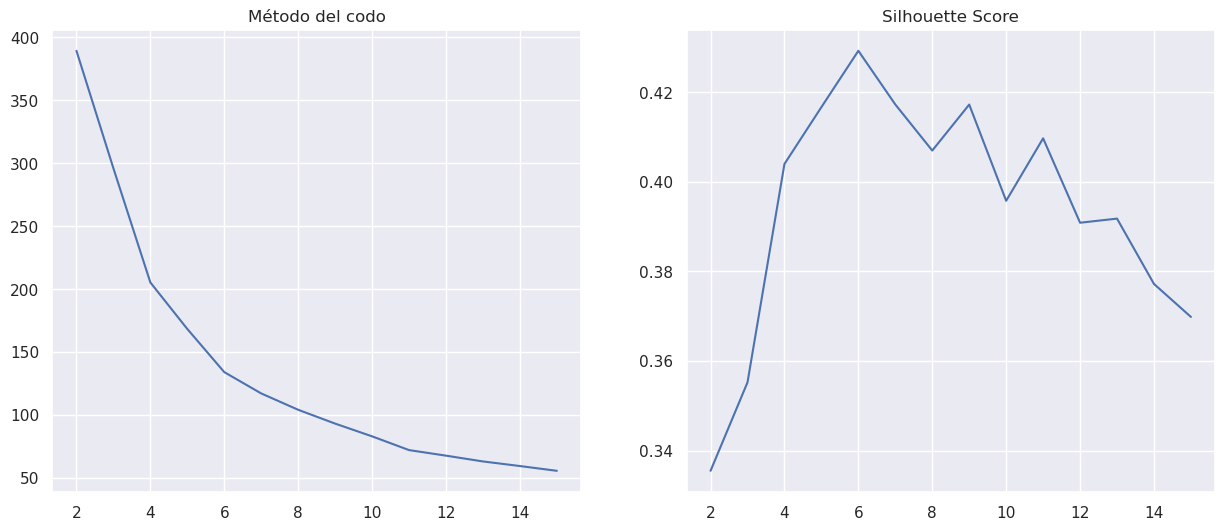

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
axs[0].plot(grupos, wcss)
axs[0].set_title('Método del codo')
axs[1].plot(grupos, sil_score)
axs[1].set_title('Silhouette Score')

In [13]:
model = KMeans(n_clusters=6, random_state=47)
clusters = model.fit_predict(X_norm)
df['Grupo'] = clusters.astype('str')
df.head()

,Genero,Edad,Ingresos Anuales (k$),Puntos en compras (1-100),Grupo
0,Hombre,19,15,39,4
1,Hombre,21,15,81,4
2,Mujer,20,16,6,0
3,Mujer,23,16,77,4
4,Mujer,31,17,40,0


Text(0.5, 1.05, '6 grupos de clientes')

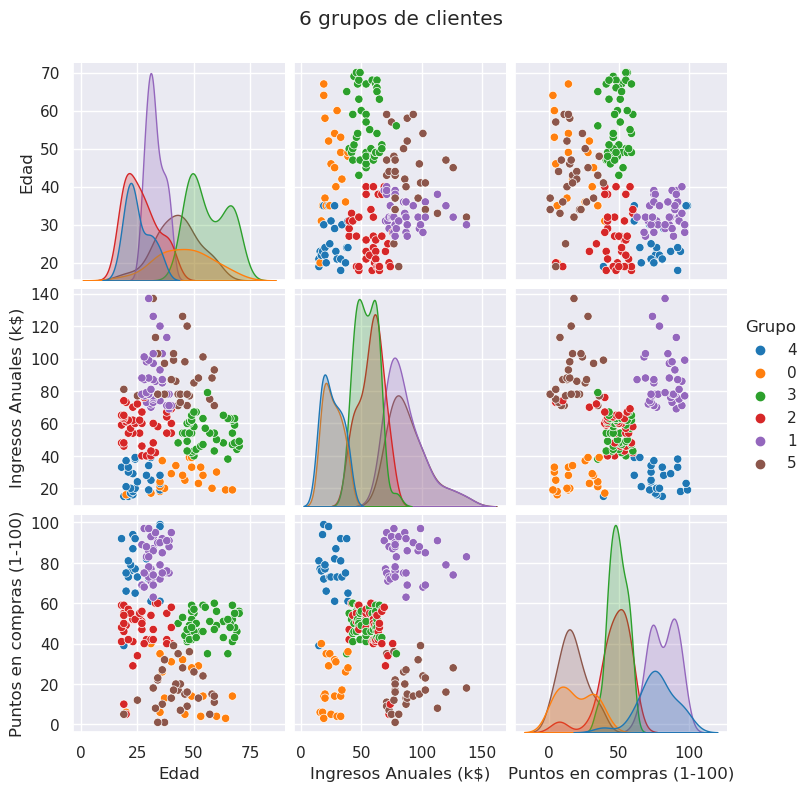

In [14]:
sns.pairplot(data=df, hue='Grupo', palette='tab10')
plt.suptitle('6 grupos de clientes', y=1.05)

In [15]:
import plotly.express as px
fig = px.scatter_3d(df, x = 'Edad', y = 'Ingresos Anuales (k$)', 
                    z = 'Puntos en compras (1-100)', 
                    title='6 grupos de clientes',
                    color='Grupo',  
                    color_discrete_sequence=px.colors.qualitative.D3)
fig.show()

In [16]:
df.groupby('Grupo').mean()

,Edad,Ingresos Anuales (k$),Puntos en compras (1-100)
Grupo,,,
0,45.523810,26.285714,19.380952
1,32.692308,86.538462,82.128205
2,26.512821,57.974359,46.692308
3,56.333333,54.266667,49.066667
4,25.250000,25.833333,76.916667
5,42.625000,89.437500,17.343750


In [17]:
df.groupby('Grupo').std()

,Edad,Ingresos Anuales (k$),Puntos en compras (1-100)
Grupo,,,
0,11.766984,7.437357,12.555780
1,3.728650,16.312485,9.364489
2,7.104008,10.024935,11.907879
3,8.453079,8.975725,6.300794
4,5.326309,8.057762,13.416138
5,9.536856,16.599529,9.881914
